# Problem Statement

A Company wants to automate the loan eligibility process based on customer details provided while filling online application form. The details filled by the customer are Gender, Marital Status, Education, Number of Dependents, Income of self and co applicant, Required Loan Amount, Required Loan Term, Credit History and others. The requirements are as follows:

1.)Check eligibility of the Customer given the inputs described above.(Classification)
2.)Identify customer segments from given data and categorize customer into one of the segments.(Clustering)
3.)If customer is not eligible for the input required amount and duration:
a.)what can be amount for the given duration.(Regression)
b.)if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?(Regression)

# Read Dataset

In [1]:
import pandas as pd
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
train = pd.read_csv("c:/Users/jagdi/Downloads/training_set (2).csv")
test = pd.read_csv("c:/Users/jagdi/Downloads/testing_set (1).csv")

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,612.000000,613.000000,592.000000,600.00000,564.000000
mean,5405.540850,1620.888940,146.412162,342.00000,0.842199
std,6118.914057,2928.624748,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2875.750000,0.000000,100.000000,360.00000,1.000000
50%,3806.000000,1167.000000,128.000000,360.00000,1.000000
75%,5803.750000,2302.000000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [7]:
train.shape

(614, 13)

In [8]:
test.shape

(367, 12)

# EDA

In [9]:
import matplotlib.pyplot as plt
import seaborn as sb

<AxesSubplot:>

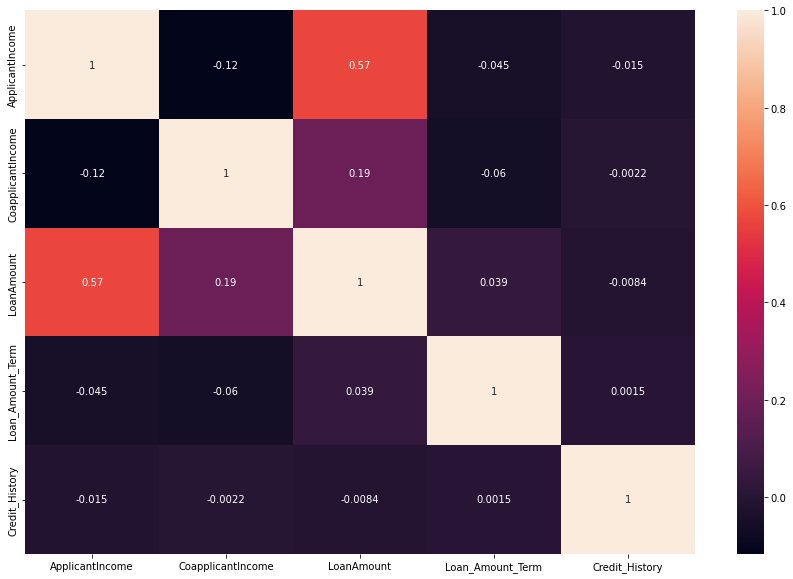

In [10]:
plt.figure(figsize = (15, 10))
sb.heatmap(train.corr(), annot = True)

In [11]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:>

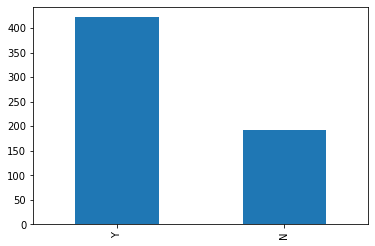

In [12]:
train['Loan_Status'].value_counts().plot.bar()

In [13]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

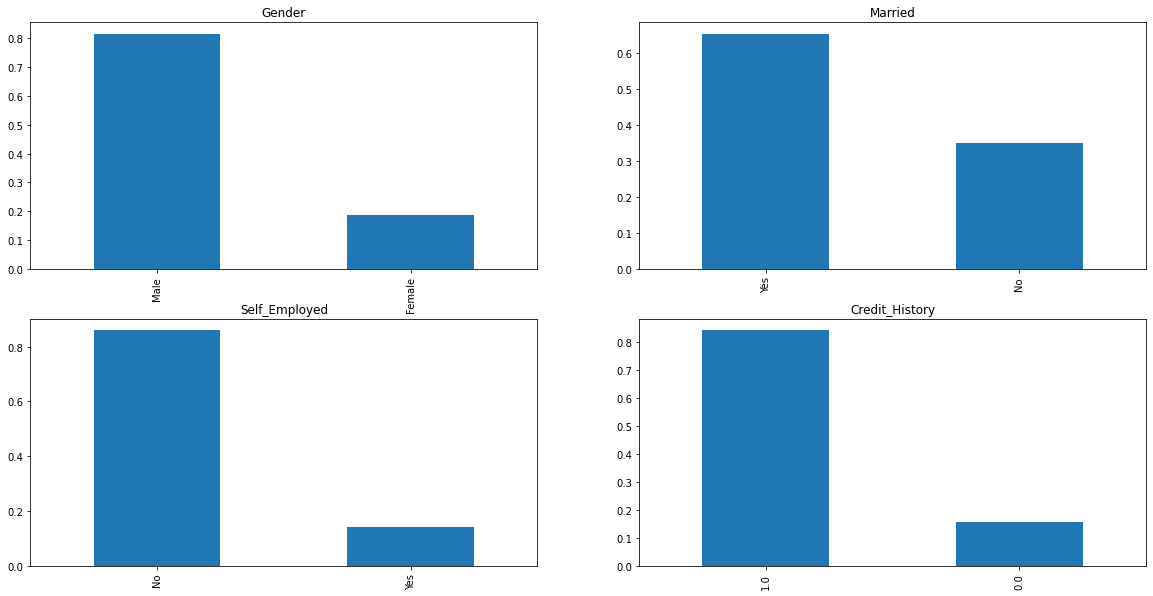

In [14]:
plt.figure(1)
plt.subplot(2,2,1)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(2,2,2) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(2,2,3) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(2,2,4) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

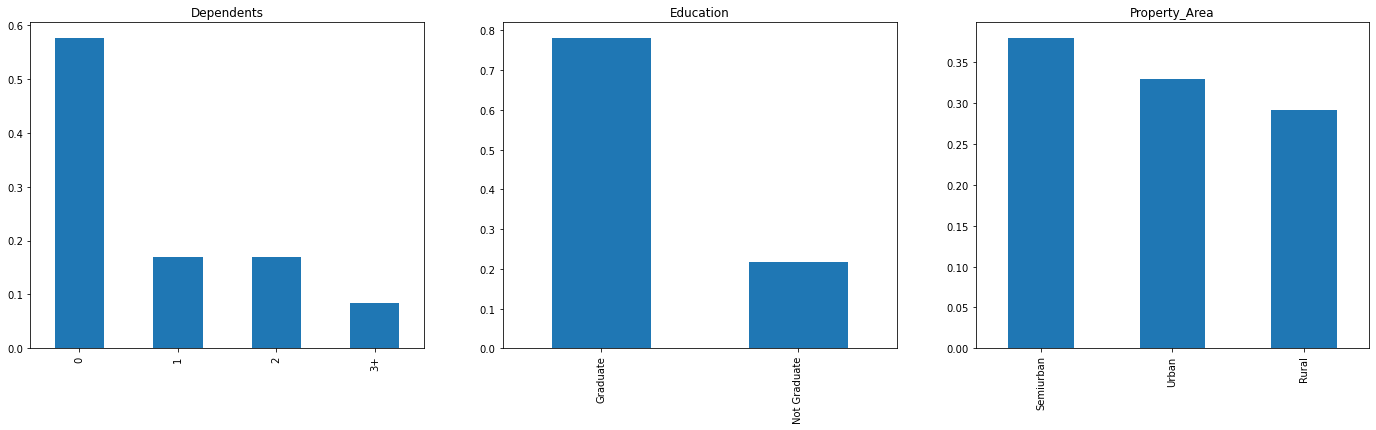

In [15]:
plt.figure(1) 
plt.subplot(1,3,1)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents') 
plt.subplot(1,3,2)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(1,3,3) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

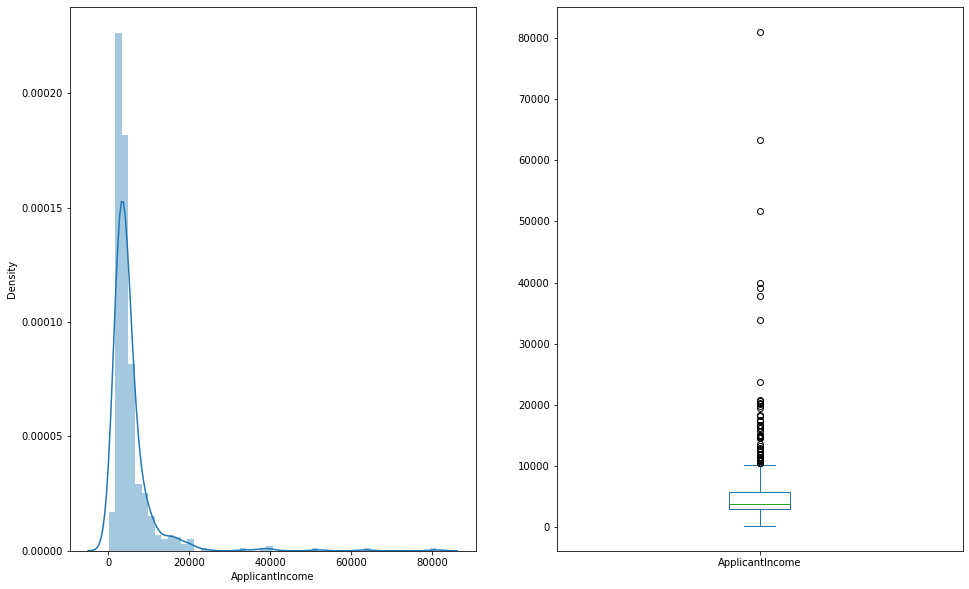

In [16]:
plt.figure(1)
plt.subplot(1,2,1) 
sb.distplot(train['ApplicantIncome']); 
plt.subplot(1,2,2) 
train['ApplicantIncome'].plot.box(figsize=(16,10)) 
plt.show()

In [17]:
train.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
from AM8 import replacer
replacer(train)

In [19]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
replacer(test)

In [21]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Define X and Y

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
Y = train[["Loan_Status"]]
X = train.drop(labels=["Loan_Status","Loan_ID"],axis=1)

In [24]:
from AM8 import catconsep
cat,con =  catconsep(X)

# Preprocessing

In [25]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [26]:
X1 = pd.get_dummies(X[cat])
X2 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
Xnew = X1.join(X2)

# splite data into training and testing set

In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Create Differant Models

# LOGISTIC REGRESSION

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)

In [29]:
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

In [30]:
from sklearn.metrics import accuracy_score
print(round(accuracy_score(ytrain,pred_tr),2))
print(round(accuracy_score(ytest,pred_ts),2))

0.81
0.81


In [31]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytrain,pred_tr))
print(confusion_matrix(ytest,pred_ts))

[[ 67  87]
 [  4 333]]
[[20 18]
 [ 5 80]]


# DTC

In [32]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy",random_state=21,max_depth=4)
model_DTC = dtc.fit(xtrain,ytrain)
pred_tr = model_DTC.predict(xtrain)
pred_ts = model_DTC.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = round(accuracy_score(ytrain,pred_tr),2)
ts_acc = round(accuracy_score(ytest,pred_ts),2)
print("Training Accuracy",tr_acc)
print("Test Accuracy",ts_acc)

Training Accuracy 0.82
Test Accuracy 0.82


# Pruning
1> max depth, 
2> min_sample_leaf, 
3> min_samples_split

In [33]:
tr = []
ts = []
for i in range(1,30,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(criterion="entropy",random_state=21,max_depth=i)
    model = dtc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = round(accuracy_score(ytrain,pred_tr),2)
    ts_acc = round(accuracy_score(ytest,pred_ts),2)
    print("training_accuracy : ",tr_acc )
    print("test_accuracy : ",ts_acc )
    tr.append(tr_acc)
    ts.append(ts_acc)

training_accuracy :  0.81
test_accuracy :  0.82
training_accuracy :  0.81
test_accuracy :  0.82
training_accuracy :  0.81
test_accuracy :  0.82
training_accuracy :  0.82
test_accuracy :  0.82
training_accuracy :  0.83
test_accuracy :  0.82
training_accuracy :  0.86
test_accuracy :  0.8
training_accuracy :  0.87
test_accuracy :  0.76
training_accuracy :  0.89
test_accuracy :  0.73
training_accuracy :  0.91
test_accuracy :  0.76
training_accuracy :  0.92
test_accuracy :  0.74
training_accuracy :  0.95
test_accuracy :  0.74
training_accuracy :  0.97
test_accuracy :  0.75
training_accuracy :  0.98
test_accuracy :  0.71
training_accuracy :  0.99
test_accuracy :  0.73
training_accuracy :  1.0
test_accuracy :  0.72
training_accuracy :  1.0
test_accuracy :  0.74
training_accuracy :  1.0
test_accuracy :  0.74
training_accuracy :  1.0
test_accuracy :  0.74
training_accuracy :  1.0
test_accuracy :  0.74
training_accuracy :  1.0
test_accuracy :  0.74
training_accuracy :  1.0
test_accuracy :  0.74


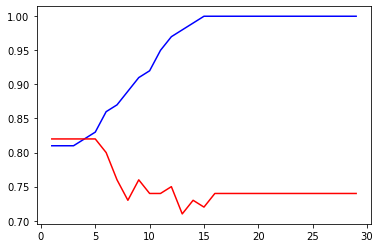

In [34]:
import matplotlib.pyplot as plt
plt.plot(range(1,30,1),tr,c="blue")
plt.plot(range(1,30,1),ts,c="red")

In [35]:
tr = []
ts = []
for i in range(1,30,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(criterion="entropy",random_state=21,min_samples_leaf=i)
    model = dtc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = round(accuracy_score(ytrain,pred_tr),2)
    ts_acc = round(accuracy_score(ytest,pred_ts),2)
    print("training_accuracy : ",tr_acc )
    print("test_accuracy : ",ts_acc )
    tr.append(tr_acc)
    ts.append(ts_acc)

training_accuracy :  1.0
test_accuracy :  0.74
training_accuracy :  0.96
test_accuracy :  0.72
training_accuracy :  0.91
test_accuracy :  0.73
training_accuracy :  0.88
test_accuracy :  0.76
training_accuracy :  0.87
test_accuracy :  0.75
training_accuracy :  0.86
test_accuracy :  0.7
training_accuracy :  0.86
test_accuracy :  0.71
training_accuracy :  0.85
test_accuracy :  0.71
training_accuracy :  0.84
test_accuracy :  0.73
training_accuracy :  0.84
test_accuracy :  0.77
training_accuracy :  0.83
test_accuracy :  0.77
training_accuracy :  0.83
test_accuracy :  0.77
training_accuracy :  0.82
test_accuracy :  0.78
training_accuracy :  0.82
test_accuracy :  0.76
training_accuracy :  0.82
test_accuracy :  0.76
training_accuracy :  0.82
test_accuracy :  0.76
training_accuracy :  0.82
test_accuracy :  0.76
training_accuracy :  0.82
test_accuracy :  0.8
training_accuracy :  0.82
test_accuracy :  0.8
training_accuracy :  0.81
test_accuracy :  0.8
training_accuracy :  0.81
test_accuracy :  0.

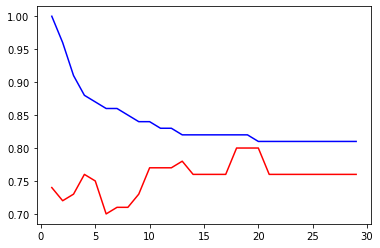

In [36]:
import matplotlib.pyplot as plt
plt.plot(range(1,30,1),tr,c="blue")
plt.plot(range(1,30,1),ts,c="red")

In [37]:
tr = []
ts = []
for i in range(2,50,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(criterion="entropy",random_state=21,min_samples_split=i)
    model = dtc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = round(accuracy_score(ytrain,pred_tr),2)
    ts_acc = round(accuracy_score(ytest,pred_ts),2)
    print("training_accuracy : ",tr_acc )
    print("test_accuracy : ",ts_acc )
    tr.append(tr_acc)
    ts.append(ts_acc)

training_accuracy :  1.0
test_accuracy :  0.74
training_accuracy :  0.99
test_accuracy :  0.72
training_accuracy :  0.98
test_accuracy :  0.73
training_accuracy :  0.97
test_accuracy :  0.72
training_accuracy :  0.97
test_accuracy :  0.75
training_accuracy :  0.96
test_accuracy :  0.75
training_accuracy :  0.95
test_accuracy :  0.72
training_accuracy :  0.94
test_accuracy :  0.72
training_accuracy :  0.93
test_accuracy :  0.73
training_accuracy :  0.93
test_accuracy :  0.73
training_accuracy :  0.92
test_accuracy :  0.72
training_accuracy :  0.92
test_accuracy :  0.73
training_accuracy :  0.91
test_accuracy :  0.73
training_accuracy :  0.91
test_accuracy :  0.73
training_accuracy :  0.9
test_accuracy :  0.74
training_accuracy :  0.9
test_accuracy :  0.74
training_accuracy :  0.9
test_accuracy :  0.74
training_accuracy :  0.9
test_accuracy :  0.75
training_accuracy :  0.9
test_accuracy :  0.75
training_accuracy :  0.9
test_accuracy :  0.74
training_accuracy :  0.89
test_accuracy :  0.76

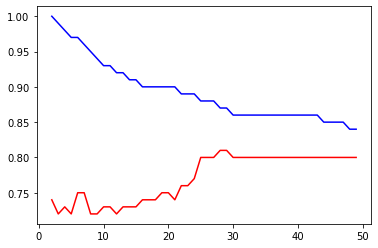

In [38]:
plt.plot(range(2,50,1),tr,c="blue")
plt.plot(range(2,50,1),ts,c="red")

# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=30,criterion="entropy",random_state=21,max_depth=4)
model = rfc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = round(accuracy_score(ytrain,pred_tr),2)
ts_acc = round(accuracy_score(ytest,pred_ts),2)

In [40]:
tr_acc

0.81

In [41]:
ts_acc

0.81

# Pruining 

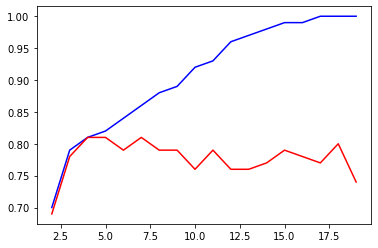

In [42]:
tr = []
ts = []
for i in range(2,20,1):
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=30,criterion="entropy",random_state=21,max_depth=i)
    model = rfc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = round(accuracy_score(ytrain,pred_tr),2)
    ts_acc = round(accuracy_score(ytest,pred_ts),2)
    tr.append(tr_acc)
    ts.append(ts_acc)
import matplotlib.pyplot as plt
plt.plot(range(2,20,1),tr,c="blue")
plt.plot(range(2,20,1),ts,c="red")

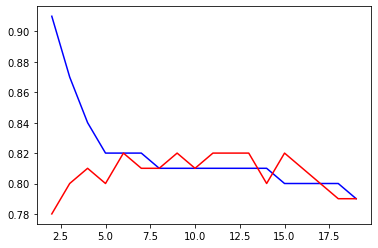

In [43]:
tr = []
ts = []
for i in range(2,20,1):
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=30,criterion="entropy",random_state=21,min_samples_leaf=i)
    model = rfc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = round(accuracy_score(ytrain,pred_tr),2)
    ts_acc = round(accuracy_score(ytest,pred_ts),2)
    tr.append(tr_acc)
    ts.append(ts_acc)
import matplotlib.pyplot as plt
plt.plot(range(2,20,1),tr,c="blue")
plt.plot(range(2,20,1),ts,c="red")

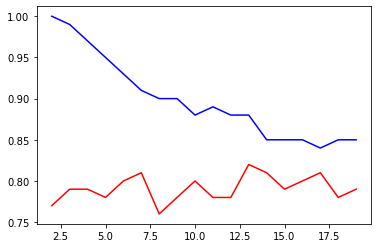

In [44]:
tr = []
ts = []
for i in range(2,20,1):
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=30,criterion="entropy",random_state=21,min_samples_split=i)
    model = rfc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = round(accuracy_score(ytrain,pred_tr),2)
    ts_acc = round(accuracy_score(ytest,pred_ts),2)
    tr.append(tr_acc)
    ts.append(ts_acc)
import matplotlib.pyplot as plt
plt.plot(range(2,20,1),tr,c="blue")
plt.plot(range(2,20,1),ts,c="red")

# AdaBoost 

In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion="entropy",random_state=21,max_depth=4)
abc = AdaBoostClassifier(dtc,n_estimators=30)
model = abc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = round(accuracy_score(ytrain,pred_tr),2)
ts_acc = round(accuracy_score(ytest,pred_ts),2)

In [46]:
tr_acc

1.0

In [47]:
ts_acc

0.74

# Pruning

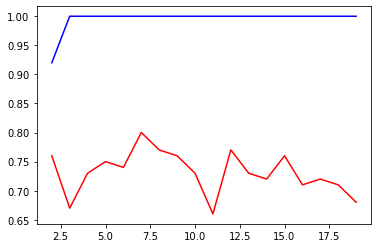

In [48]:
tr = []
ts = []
for i in range(2,20,1):
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(criterion="entropy",random_state=21,max_depth=i)
    abc = AdaBoostClassifier(dtc,n_estimators=30)
    model = abc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = round(accuracy_score(ytrain,pred_tr),2)
    ts_acc = round(accuracy_score(ytest,pred_ts),2)
    tr.append(tr_acc)
    ts.append(ts_acc)
import matplotlib.pyplot as plt
plt.plot(range(2,20,1),tr,c="blue")
plt.plot(range(2,20,1),ts,c="red")

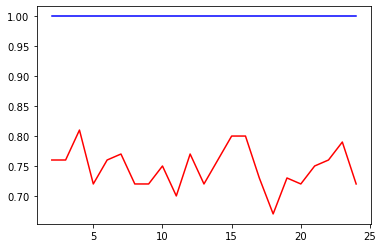

In [49]:
tr = []
ts = []
for i in range(2,25,1):
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(criterion="entropy",random_state=21,min_samples_leaf=i)
    abc = AdaBoostClassifier(dtc,n_estimators=30)
    model = abc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = round(accuracy_score(ytrain,pred_tr),2)
    ts_acc = round(accuracy_score(ytest,pred_ts),2)
    tr.append(tr_acc)
    ts.append(ts_acc)
import matplotlib.pyplot as plt
plt.plot(range(2,25,1),tr,c="blue")
plt.plot(range(2,25,1),ts,c="red")

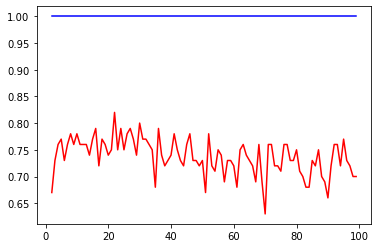

In [50]:
tr = []
ts = []
for i in range(2,100,1):
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(criterion="entropy",random_state=21,min_samples_split=i)
    abc = AdaBoostClassifier(dtc,n_estimators=30)
    model = abc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = round(accuracy_score(ytrain,pred_tr),2)
    ts_acc = round(accuracy_score(ytest,pred_ts),2)
    tr.append(tr_acc)
    ts.append(ts_acc)
import matplotlib.pyplot as plt
plt.plot(range(2,100,1),tr,c="blue")
plt.plot(range(2,100,1),ts,c="red")

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy",random_state=21,max_depth=4)
model_DTC = dtc.fit(xtrain,ytrain)
pred_tr = model_DTC.predict(xtrain)
pred_ts = model_DTC.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc =round(accuracy_score(ytrain,pred_tr),2)
ts_acc = round(accuracy_score(ytest,pred_ts),2)
print("Training Accuracy",tr_acc)
print("Test Accuracy",ts_acc)

Training Accuracy 0.82
Test Accuracy 0.82


In [52]:
print("In Logistic Regresion Accuracy is both 0.81")
print("In DTC  Accuracy is both 0.82")
print("In RFC  Accuracy is both 0.81")
print("In DTC using ADABOOST  train Accuracy is 1 and test Accuracy is  0.792")

In Logistic Regresion Accuracy is both 0.81
In DTC  Accuracy is both 0.82
In RFC  Accuracy is both 0.81
In DTC using ADABOOST  train Accuracy is 1 and test Accuracy is  0.792


# So After creating various models the Accuracy of DTC is better than other

# Prediction on test Data

In [53]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.000000,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.000000,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,0.825444,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.000000,Rural


In [54]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [55]:
clos_to_keep = xtrain.columns

In [56]:
from AM8 import preprocessing

In [57]:
Xtest = test.drop(labels=["Loan_ID"],axis=1)
catt,cont = catconsep(Xtest)
Xtest_new = preprocessing(Xtest)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1_test =pd.DataFrame(ss.fit_transform(Xtest[cont]),columns=cont)
X2_test = pd.get_dummies(Xtest[catt])
Xtest_new = X1_test.join(X2_test)

In [58]:
Xtest_new  = Xtest_new[clos_to_keep]

In [59]:
#Xtest_new

In [60]:
pred_test = model_DTC.predict(Xtest_new)

In [61]:
pred_test

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [62]:
j = test[["Loan_ID"]]
j["Loan_Status_Pred"]=pred_test

In [63]:
j

,Loan_ID,Loan_Status_Pred
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [64]:
j.to_csv("Predicted loan status proj.csv")

In [65]:
test['Loan_Status_Pred'] = pred_test

In [66]:
#test

# 2.)Identify customer segments from given data and categorize customer into one of the segments.(Clustering)

In [67]:
pd.DataFrame([Xnew.columns,dtc.feature_importances_]).T

,0,1
0,Gender_Female,0.0
1,Gender_Male,0.0
2,Married_No,0.0
3,Married_Yes,0.0
4,Dependents_0,0.0
5,Dependents_1,0.0
6,Dependents_2,0.0
7,Dependents_3+,0.0
8,Education_Graduate,0.0
9,Education_Not Graduate,0.0


In [68]:
A = train[["CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]]

In [69]:
Anew = pd.DataFrame(ss.fit_transform(A),columns=["CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"])

In [70]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
model = km.fit(Anew)

In [71]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [72]:
A['Cluster'] = model.labels_

In [73]:
B = []
for i in A.Credit_History:
    if(i<0.5):
        B.append(0)
    else:
        B.append(1)

In [74]:
A.Credit_History = B

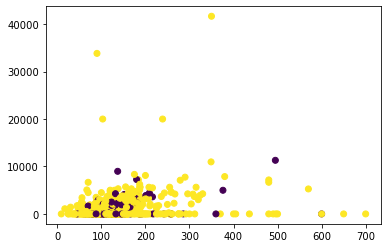

In [75]:
plt.scatter(A.LoanAmount,A.CoapplicantIncome,c=B)

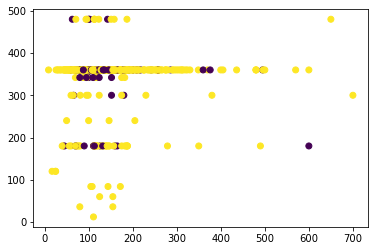

In [76]:
plt.scatter(A.LoanAmount,A.Loan_Amount_Term,c=B)

In [77]:
d = le.fit_transform(train["Loan_Status"])

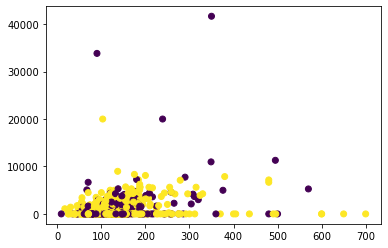

In [78]:
plt.scatter(A.LoanAmount,A.CoapplicantIncome,c=d)

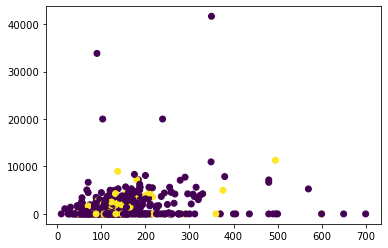

In [79]:
plt.scatter(A.LoanAmount,A.CoapplicantIncome,c=A.Cluster)

# 3.)If customer is not eligible for the input required amount and duration:
a.)what can be amount for the given duration.(Regression)

In [80]:
X1 = train[train.Loan_Status == 'Y']

In [81]:
X2 = test[test.Loan_Status_Pred == 'Y']

In [82]:
X2 = X2.rename({"Loan_Status_Pred":"Loan_Status"},axis=1)

In [83]:
X3 = pd.concat([X1,X2])

In [84]:
replacer(X3)

In [85]:
X3.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [86]:
cat,con = catconsep(X3)

In [87]:
#cat

In [88]:
#con

In [89]:
cat.remove("Loan_ID")
cat.remove("Loan_Status")
con.remove("LoanAmount")

# define X and Y

In [90]:
Y = X3[["LoanAmount"]]
X = X3.drop(labels=["LoanAmount","Loan_ID","Loan_Status"],axis=1)

In [91]:
XA1 = pd.DataFrame(ss.fit_transform(X3[con]),columns=con)
XA2 = pd.get_dummies(X3[cat])
XA2.index = range(0,730)
XAnew = XA1.join(XA2)

# splite

In [92]:
xtrain,xtest,ytrain,ytest=train_test_split(XAnew,Y,test_size=0.2,random_state=21)

In [93]:
X3.corr()[["LoanAmount"]]

,LoanAmount
ApplicantIncome,0.577321
CoapplicantIncome,0.132325
LoanAmount,1.000000
Loan_Amount_Term,0.060321
Credit_History,-0.066319


# Create  linear Model

In [94]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)

In [95]:
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

In [96]:
from sklearn.metrics import mean_squared_error
print(round(mean_squared_error(ytrain,pred_tr),2))
print(round(mean_squared_error(ytest,pred_ts),2))

3151.99
5881.37


In [97]:
w = []
q = 0.1
for i in range(0,1000,1):
    q = q+0.01
    q = round(q,4)
    w.append(q)
    
tr = []
ts = []
for i in w:
    from sklearn.linear_model import Ridge
    ls = Ridge(alpha = i)
    model = ls.fit(xtrain,ytrain)
    
    pred_tr = model.predict(xtrain)
    tr_err = round(mean_squared_error(ytrain,pred_tr),2)
    
    pred_ts = model.predict(xtest)
    ts_err = round(mean_squared_error(ytest,pred_ts),2)
    
    tr.append(tr_err)
    ts.append(ts_err)

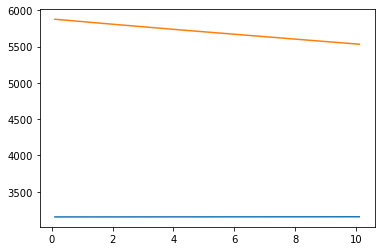

In [98]:
import matplotlib.pyplot as plt
plt.plot(w,tr)
plt.plot(w,ts)

In [99]:
w = []
q = 0.01
for i in range(0,1000,1):
    q = q + 0.01
    q = round(q,2)
    w.append(q)
for i in w:
    from sklearn.linear_model import Ridge
    rr = Ridge(alpha = i)
    model = rr.fit(xtrain,ytrain)

    pred_tr = model.predict(xtrain)
    tr_err = round(mean_squared_error(ytrain,pred_tr),2)

    pred_ts = model.predict(xtest)
    ts_err = round(mean_squared_error(ytest,pred_ts),2)

    print("==========",i,"===========")
    print(tr_err)
    print(ts_err)
    print(tr_err - ts_err)

========== 0.02 ===========
3151.99
5880.64
-2728.6500000000005
========== 0.03 ===========
3151.99
5880.27
-2728.2800000000007
========== 0.04 ===========
3151.99
5879.9
-2727.91
========== 0.05 ===========
3151.99
5879.54
-2727.55
========== 0.06 ===========
3151.99
5879.17
-2727.1800000000003
========== 0.07 ===========
3151.99
5878.8
-2726.8100000000004
========== 0.08 ===========
3151.99
5878.44
-2726.45
========== 0.09 ===========
3151.99
5878.07
-2726.08
========== 0.1 ===========
3151.99
5877.7
-2725.71
========== 0.11 ===========
3151.99
5877.34
-2725.3500000000004
========== 0.12 ===========
3151.99
5876.97
-2724.9800000000005
========== 0.13 ===========
3151.99
5876.6
-2724.6100000000006
========== 0.14 ===========
3151.99
5876.24
-2724.25
========== 0.15 ===========
3151.99
5875.87
-2723.88
========== 0.16 ===========
3152.0
5875.5
-2723.5
========== 0.17 ===========
3152.0
5875.14
-2723.1400000000003
========== 0.18 ===========
3152.0
5874.77
-2722.7700000000004
==========

-2674.79
========== 1.51 ===========
3152.05
5826.48
-2674.4299999999994
========== 1.52 ===========
3152.05
5826.12
-2674.0699999999997
========== 1.53 ===========
3152.05
5825.76
-2673.71
========== 1.54 ===========
3152.05
5825.4
-2673.3499999999995
========== 1.55 ===========
3152.05
5825.04
-2672.99
========== 1.56 ===========
3152.05
5824.68
-2672.63
========== 1.57 ===========
3152.05
5824.32
-2672.2699999999995
========== 1.58 ===========
3152.05
5823.96
-2671.91
========== 1.59 ===========
3152.05
5823.6
-2671.55
========== 1.6 ===========
3152.06
5823.24
-2671.18
========== 1.61 ===========
3152.06
5822.88
-2670.82
========== 1.62 ===========
3152.06
5822.52
-2670.4600000000005
========== 1.63 ===========
3152.06
5822.16
-2670.1
========== 1.64 ===========
3152.06
5821.8
-2669.7400000000002
========== 1.65 ===========
3152.06
5821.44
-2669.3799999999997
========== 1.66 ===========
3152.06
5821.08
-2669.02
========== 1.67 ===========
3152.06
5820.72
-2668.6600000000003
=======

========== 2.96 ===========
3152.2
5774.76
-2622.5600000000004
========== 2.97 ===========
3152.2
5774.41
-2622.21
========== 2.98 ===========
3152.2
5774.06
-2621.8600000000006
========== 2.99 ===========
3152.21
5773.7
-2621.49
========== 3.0 ===========
3152.21
5773.35
-2621.1400000000003
========== 3.01 ===========
3152.21
5773.0
-2620.79
========== 3.02 ===========
3152.21
5772.64
-2620.4300000000003
========== 3.03 ===========
3152.21
5772.29
-2620.08
========== 3.04 ===========
3152.21
5771.94
-2619.7299999999996
========== 3.05 ===========
3152.21
5771.58
-2619.37
========== 3.06 ===========
3152.22
5771.23
-2619.0099999999998
========== 3.07 ===========
3152.22
5770.88
-2618.6600000000003
========== 3.08 ===========
3152.22
5770.52
-2618.3000000000006
========== 3.09 ===========
3152.22
5770.17
-2617.9500000000003
========== 3.1 ===========
3152.22
5769.82
-2617.6
========== 3.11 ===========
3152.22
5769.47
-2617.2500000000005
========== 3.12 ===========
3152.22
5769.11
-2616.

========== 4.39 ===========
3152.45
5724.7
-2572.25
========== 4.4 ===========
3152.45
5724.35
-2571.9000000000005
========== 4.41 ===========
3152.45
5724.0
-2571.55
========== 4.42 ===========
3152.45
5723.66
-2571.21
========== 4.43 ===========
3152.45
5723.31
-2570.8600000000006
========== 4.44 ===========
3152.46
5722.96
-2570.5
========== 4.45 ===========
3152.46
5722.62
-2570.16
========== 4.46 ===========
3152.46
5722.27
-2569.8100000000004
========== 4.47 ===========
3152.46
5721.92
-2569.46
========== 4.48 ===========
3152.46
5721.58
-2569.12
========== 4.49 ===========
3152.47
5721.23
-2568.7599999999998
========== 4.5 ===========
3152.47
5720.88
-2568.4100000000003
========== 4.51 ===========
3152.47
5720.54
-2568.07
========== 4.52 ===========
3152.47
5720.19
-2567.72
========== 4.53 ===========
3152.47
5719.84
-2567.3700000000003
========== 4.54 ===========
3152.48
5719.5
-2567.02
========== 4.55 ===========
3152.48
5719.15
-2566.6699999999996
========== 4.56 ===========


========== 5.92 ===========
3152.81
5672.13
-2519.32
========== 5.93 ===========
3152.81
5671.79
-2518.98
========== 5.94 ===========
3152.81
5671.45
-2518.64
========== 5.95 ===========
3152.81
5671.11
-2518.2999999999997
========== 5.96 ===========
3152.82
5670.77
-2517.9500000000003
========== 5.97 ===========
3152.82
5670.43
-2517.61
========== 5.98 ===========
3152.82
5670.09
-2517.27
========== 5.99 ===========
3152.83
5669.75
-2516.92
========== 6.0 ===========
3152.83
5669.41
-2516.58
========== 6.01 ===========
3152.83
5669.07
-2516.24
========== 6.02 ===========
3152.83
5668.73
-2515.8999999999996
========== 6.03 ===========
3152.84
5668.39
-2515.55
========== 6.04 ===========
3152.84
5668.05
-2515.21
========== 6.05 ===========
3152.84
5667.71
-2514.87
========== 6.06 ===========
3152.84
5667.37
-2514.5299999999997
========== 6.07 ===========
3152.85
5667.03
-2514.18
========== 6.08 ===========
3152.85
5666.69
-2513.8399999999997
========== 6.09 ===========
3152.85
5666.35
-

========== 7.46 ===========
3153.27
5620.24
-2466.97
========== 7.47 ===========
3153.27
5619.91
-2466.64
========== 7.48 ===========
3153.28
5619.57
-2466.2899999999995
========== 7.49 ===========
3153.28
5619.24
-2465.9599999999996
========== 7.5 ===========
3153.28
5618.9
-2465.6199999999994
========== 7.51 ===========
3153.29
5618.57
-2465.2799999999997
========== 7.52 ===========
3153.29
5618.24
-2464.95
========== 7.53 ===========
3153.29
5617.9
-2464.6099999999997
========== 7.54 ===========
3153.3
5617.57
-2464.2699999999995
========== 7.55 ===========
3153.3
5617.24
-2463.9399999999996
========== 7.56 ===========
3153.3
5616.9
-2463.5999999999995
========== 7.57 ===========
3153.31
5616.57
-2463.2599999999998
========== 7.58 ===========
3153.31
5616.24
-2462.93
========== 7.59 ===========
3153.31
5615.9
-2462.5899999999997
========== 7.6 ===========
3153.32
5615.57
-2462.2499999999995
========== 7.61 ===========
3153.32
5615.24
-2461.9199999999996
========== 7.62 ===========
3

========== 8.87 ===========
3153.78
5573.6
-2419.82
========== 8.88 ===========
3153.78
5573.27
-2419.4900000000002
========== 8.89 ===========
3153.79
5572.94
-2419.1499999999996
========== 8.9 ===========
3153.79
5572.62
-2418.83
========== 8.91 ===========
3153.79
5572.29
-2418.5
========== 8.92 ===========
3153.8
5571.96
-2418.16
========== 8.93 ===========
3153.8
5571.63
-2417.83
========== 8.94 ===========
3153.81
5571.31
-2417.5000000000005
========== 8.95 ===========
3153.81
5570.98
-2417.1699999999996
========== 8.96 ===========
3153.81
5570.65
-2416.8399999999997
========== 8.97 ===========
3153.82
5570.32
-2416.4999999999995
========== 8.98 ===========
3153.82
5570.0
-2416.18
========== 8.99 ===========
3153.83
5569.67
-2415.84
========== 9.0 ===========
3153.83
5569.34
-2415.51
========== 9.01 ===========
3153.83
5569.01
-2415.1800000000003
========== 9.02 ===========
3153.84
5568.69
-2414.8499999999995
========== 9.03 ===========
3153.84
5568.36
-2414.5199999999995
=======

In [100]:
w = []
q = 0.01
for i in range(0,1000,1):
    q = q + 0.01
    q = round(q,2)
    w.append(q)
for i in w:
    from sklearn.linear_model import Lasso
    ls = Lasso(alpha = i)
    model = ls.fit(xtrain,ytrain)

    pred_tr = model.predict(xtrain)
    tr_err = round(mean_squared_error(ytrain,pred_tr),2)

    pred_ts = model.predict(xtest)
    ts_err = round(mean_squared_error(ytest,pred_ts),2)

    print("==========",i,"===========")
    print(tr_err)
    print(ts_err)
    print(tr_err - ts_err)

========== 0.02 ===========
3152.02
5878.29
-2726.27
========== 0.03 ===========
3152.04
5876.52
-2724.4800000000005
========== 0.04 ===========
3152.08
5874.68
-2722.6000000000004
========== 0.05 ===========
3152.13
5872.87
-2720.74
========== 0.06 ===========
3152.19
5871.03
-2718.8399999999997
========== 0.07 ===========
3152.25
5869.15
-2716.8999999999996
========== 0.08 ===========
3152.33
5867.48
-2715.1499999999996
========== 0.09 ===========
3152.39
5865.72
-2713.3300000000004
========== 0.1 ===========
3152.46
5863.91
-2711.45
========== 0.11 ===========
3152.54
5862.06
-2709.5200000000004
========== 0.12 ===========
3152.63
5860.27
-2707.6400000000003
========== 0.13 ===========
3152.72
5858.44
-2705.72
========== 0.14 ===========
3152.82
5856.62
-2703.7999999999997
========== 0.15 ===========
3152.93
5854.84
-2701.9100000000003
========== 0.16 ===========
3153.04
5853.08
-2700.04
========== 0.17 ===========
3153.16
5851.27
-2698.1100000000006
========== 0.18 ===========
3153

========== 1.48 ===========
3204.32
5568.86
-2364.5399999999995
========== 1.49 ===========
3204.76
5566.18
-2361.42
========== 1.5 ===========
3205.2
5563.51
-2358.3100000000004
========== 1.51 ===========
3205.64
5560.85
-2355.2100000000005
========== 1.52 ===========
3206.08
5558.19
-2352.1099999999997
========== 1.53 ===========
3206.53
5555.53
-2348.9999999999995
========== 1.54 ===========
3206.99
5552.89
-2345.9000000000005
========== 1.55 ===========
3207.44
5550.24
-2342.7999999999997
========== 1.56 ===========
3207.9
5547.6
-2339.7000000000003
========== 1.57 ===========
3208.36
5544.97
-2336.61
========== 1.58 ===========
3208.82
5542.34
-2333.52
========== 1.59 ===========
3209.29
5539.71
-2330.42
========== 1.6 ===========
3209.76
5537.09
-2327.33
========== 1.61 ===========
3210.23
5534.48
-2324.2499999999995
========== 1.62 ===========
3210.71
5531.87
-2321.16
========== 1.63 ===========
3211.19
5529.26
-2318.07
========== 1.64 ===========
3211.67
5526.66
-2314.99
=====

========== 2.94 ===========
3267.44
5145.34
-1877.9
========== 2.95 ===========
3267.91
5142.36
-1874.4499999999998
========== 2.96 ===========
3268.38
5139.38
-1871.0
========== 2.97 ===========
3268.85
5136.41
-1867.56
========== 2.98 ===========
3269.32
5133.44
-1864.1199999999994
========== 2.99 ===========
3269.79
5130.47
-1860.6800000000003
========== 3.0 ===========
3270.26
5127.51
-1857.25
========== 3.01 ===========
3270.74
5124.55
-1853.8100000000004
========== 3.02 ===========
3271.22
5121.59
-1850.3700000000003
========== 3.03 ===========
3271.69
5118.63
-1846.94
========== 3.04 ===========
3272.17
5115.68
-1843.5100000000002
========== 3.05 ===========
3272.66
5112.73
-1840.0699999999997
========== 3.06 ===========
3273.14
5109.78
-1836.6399999999999
========== 3.07 ===========
3273.63
5106.83
-1833.1999999999998
========== 3.08 ===========
3274.11
5103.89
-1829.7800000000002
========== 3.09 ===========
3274.6
5100.95
-1826.35
========== 3.1 ===========
3275.09
5098.01
-18

========== 4.39 ===========
3351.55
4741.24
-1389.6899999999996
========== 4.4 ===========
3352.24
4738.64
-1386.4000000000005
========== 4.41 ===========
3352.94
4736.05
-1383.1100000000001
========== 4.42 ===========
3353.64
4733.46
-1379.8200000000002
========== 4.43 ===========
3354.34
4730.88
-1376.54
========== 4.44 ===========
3355.04
4728.3
-1373.2600000000002
========== 4.45 ===========
3355.75
4725.72
-1369.9700000000003
========== 4.46 ===========
3356.45
4723.14
-1366.6900000000005
========== 4.47 ===========
3357.16
4720.56
-1363.4000000000005
========== 4.48 ===========
3357.88
4717.84
-1359.96
========== 4.49 ===========
3358.59
4715.27
-1356.6800000000003
========== 4.5 ===========
3359.3
4712.69
-1353.3899999999994
========== 4.51 ===========
3360.01
4710.13
-1350.12
========== 4.52 ===========
3360.71
4707.73
-1347.0199999999995
========== 4.53 ===========
3361.43
4705.17
-1343.7400000000002
========== 4.54 ===========
3362.15
4702.61
-1340.4599999999996
========== 4.

========== 5.88 ===========
3449.43
4373.91
-924.48
========== 5.89 ===========
3449.9
4371.5
-921.5999999999999
========== 5.9 ===========
3450.36
4369.09
-918.73
========== 5.91 ===========
3450.83
4366.68
-915.8500000000004
========== 5.92 ===========
3451.3
4364.27
-912.9700000000003
========== 5.93 ===========
3451.77
4361.86
-910.0899999999997
========== 5.94 ===========
3452.24
4359.46
-907.2200000000003
========== 5.95 ===========
3452.71
4357.05
-904.3400000000001
========== 5.96 ===========
3453.18
4354.65
-901.4699999999998
========== 5.97 ===========
3453.65
4352.25
-898.5999999999999
========== 5.98 ===========
3454.12
4349.86
-895.7399999999998
========== 5.99 ===========
3454.6
4347.46
-892.8600000000001
========== 6.0 ===========
3455.07
4345.07
-889.9999999999995
========== 6.01 ===========
3455.55
4342.68
-887.1300000000001
========== 6.02 ===========
3456.03
4340.29
-884.2599999999998
========== 6.03 ===========
3456.5
4337.9
-881.3999999999996
========== 6.04 ======

========== 7.34 ===========
3525.84
4041.2
-515.3599999999997
========== 7.35 ===========
3526.42
4039.06
-512.6399999999999
========== 7.36 ===========
3527.0
4036.92
-509.9200000000001
========== 7.37 ===========
3527.58
4034.78
-507.2000000000003
========== 7.38 ===========
3528.17
4032.64
-504.4699999999998
========== 7.39 ===========
3528.75
4030.51
-501.7600000000002
========== 7.4 ===========
3529.34
4028.37
-499.02999999999975
========== 7.41 ===========
3529.92
4026.24
-496.3199999999997
========== 7.42 ===========
3530.51
4024.11
-493.5999999999999
========== 7.43 ===========
3531.1
4021.99
-490.8899999999999
========== 7.44 ===========
3531.69
4019.86
-488.1700000000001
========== 7.45 ===========
3532.28
4017.74
-485.4599999999996
========== 7.46 ===========
3532.87
4015.62
-482.75
========== 7.47 ===========
3533.46
4013.5
-480.03999999999996
========== 7.48 ===========
3534.05
4011.38
-477.3299999999999
========== 7.49 ===========
3534.64
4009.26
-474.62000000000035
=====

========== 8.65 ===========
3608.76
3776.47
-167.70999999999958
========== 8.66 ===========
3609.44
3774.57
-165.1300000000001
========== 8.67 ===========
3610.13
3772.67
-162.53999999999996
========== 8.68 ===========
3610.82
3770.78
-159.96000000000004
========== 8.69 ===========
3611.5
3768.89
-157.38999999999987
========== 8.7 ===========
3612.19
3767.0
-154.80999999999995
========== 8.71 ===========
3612.88
3765.11
-152.23000000000002
========== 8.72 ===========
3613.57
3763.22
-149.64999999999964
========== 8.73 ===========
3614.14
3761.33
-147.19000000000005
========== 8.74 ===========
3614.67
3759.44
-144.76999999999998
========== 8.75 ===========
3615.2
3757.55
-142.35000000000036
========== 8.76 ===========
3615.73
3755.66
-139.92999999999984
========== 8.77 ===========
3616.27
3753.77
-137.5
========== 8.78 ===========
3616.8
3751.89
-135.0899999999997
========== 8.79 ===========
3617.33
3750.0
-132.67000000000007
========== 8.8 ===========
3617.86
3748.12
-130.2599999999997

In [101]:
    from sklearn.linear_model import Lasso
    ls = Lasso(alpha = 9)
    model = ls.fit(xtrain,ytrain)

    pred_tr = model.predict(xtrain)
    tr_err = round(mean_squared_error(ytrain,pred_tr),2)

    pred_ts = model.predict(xtest)
    ts_err = round(mean_squared_error(ytest,pred_ts),2)

    print("==========",i,"===========")
    print(tr_err)
    print(ts_err)
    print(tr_err - ts_err)

========== 10.01 ===========
3628.66
3710.91
-82.25


In [102]:
C = test[test.Loan_Status_Pred == "N"]

In [103]:
C = test.drop(labels=["Loan_Status_Pred","Loan_ID","LoanAmount"],axis=1)

In [104]:
replacer(C)
C.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [105]:
XAnew

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.113473,-0.788178,0.301375,0.230903,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,-0.400433,-0.788178,0.301375,0.230903,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
2,-0.475652,0.495111,0.301375,0.230903,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
3,0.140711,-0.788178,0.301375,0.230903,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
4,0.035549,1.495401,0.301375,0.230903,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,-0.218428,0.178915,0.301375,0.230903,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
726,-0.191551,-0.402320,0.301375,0.230903,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
727,-0.355337,0.296468,0.301375,-1.123363,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
728,-0.039670,0.514159,0.301375,0.230903,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


In [106]:
C1 = pd.DataFrame(ss.fit_transform(C[con]),columns=con)
C2 = pd.get_dummies(C[cat])
Cnew = C1.join(C2)

In [107]:
Not_pred = model.predict(Cnew)

In [122]:
Not_pred

array([147.20912627, 125.91073579, 145.72297654, 121.93017319,
       123.22357112, 122.92829924, 112.91881134, 129.16107557,
       224.86775877, 122.06641893, 121.40797059, 117.21601081,
       131.95808179, 210.53923565, 136.86511026, 146.68898125,
       145.09009698, 129.26103484, 206.1566835 , 114.58793923,
       114.62363424, 111.5154012 , 129.43586916, 128.02264496,
       157.64655812, 165.47233747, 137.76643105, 176.30308774,
       130.67363006, 127.32983808, 115.39195369, 154.95256335,
       128.3623318 , 126.77999782, 122.740312  , 121.98699995,
       175.69587475, 121.9763431 , 148.3181147 , 132.91059868,
       148.85183403, 126.83514407, 114.52168793, 162.92404917,
       127.05105333, 144.97054088, 136.50111607, 120.09080838,
       168.07754201, 170.36017208, 120.10459708, 128.00420658,
       134.96057075, 134.56736298, 143.01852395, 118.06137718,
       134.27419923, 137.50175181, 129.70432633, 137.39506933,
       120.10874063, 160.83333939, 139.82895545, 116.34

In [109]:
test[test.Loan_Status_Pred == "N"]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_Pred
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.000000,360.000000,0.000000,Rural,N
13,LP001094,Male,Yes,2,Graduate,No,12173,0,166.000000,360.000000,0.000000,Semiurban,N
25,LP001153,Male,No,0,Graduate,No,0,24000,148.000000,360.000000,0.000000,Rural,N
35,LP001203,Male,No,0,Graduate,No,3150,0,176.000000,360.000000,0.000000,Semiurban,N
58,LP001323,Female,Yes,2,Graduate,No,2779,3664,176.000000,360.000000,0.000000,Semiurban,N
63,LP001347,Female,No,0,Graduate,No,2101,1500,108.000000,360.000000,0.000000,Rural,N
66,LP001352,Male,Yes,0,Not Graduate,No,4700,0,135.000000,360.000000,0.000000,Semiurban,N
69,LP001361,Male,Yes,0,Graduate,No,2458,5105,188.000000,360.000000,0.000000,Rural,N
80,LP001420,Male,Yes,3+,Graduate,No,3829,1103,163.000000,360.000000,0.000000,Urban,N
82,LP001445,Male,Yes,2,Not Graduate,No,4136,0,149.000000,480.000000,0.000000,Rural,N


# b.)if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?(Regression)

In [110]:
D = test[test.Loan_Amount_Term <=240]
D.index = range(0,34)

In [111]:
#train

# Define X and Y 

In [112]:
Y = train[["Loan_Amount_Term"]]
X = train.drop(labels=["Loan_Amount_Term","Loan_ID","Loan_Status"],axis=1)
Xnew = preprocessing(X)

In [113]:
X.shape

(614, 10)

In [114]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Property_Area'],
      dtype='object')

# Train test splite

In [115]:
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Create linear Model

In [116]:
model = lm.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

In [117]:
from sklearn.metrics import mean_squared_error
print(round(mean_squared_error(ytrain,pred_tr),2))
print(round(mean_squared_error(ytest,pred_ts),2))

4034.65
3522.37


In [118]:
w = []
q = 0.01
for i in range(0,1000,1):
    q = q + 0.01
    q = round(q,2)
    w.append(q)
for i in w:
    from sklearn.linear_model import Lasso
    ls = Lasso(alpha = i)
    model = ls.fit(xtrain,ytrain)

    pred_tr = model.predict(xtrain)
    tr_err = round(mean_squared_error(ytrain,pred_tr),2)

    pred_ts = model.predict(xtest)
    ts_err = round(mean_squared_error(ytest,pred_ts),2)

    print("==========",i,"===========")
    print(tr_err)
    print(ts_err)
    print(tr_err - ts_err)

========== 0.02 ===========
4025.45
3521.62
503.8299999999999
========== 0.03 ===========
4025.49
3520.39
505.0999999999999
========== 0.04 ===========
4025.53
3519.18
506.35000000000036
========== 0.05 ===========
4025.59
3517.98
507.6100000000001
========== 0.06 ===========
4025.65
3516.79
508.8600000000001
========== 0.07 ===========
4025.74
3515.61
510.12999999999965
========== 0.08 ===========
4025.83
3514.44
511.3899999999999
========== 0.09 ===========
4025.94
3513.28
512.6599999999999
========== 0.1 ===========
4026.06
3512.15
513.9099999999999
========== 0.11 ===========
4026.19
3511.01
515.1799999999998
========== 0.12 ===========
4026.33
3509.89
516.44
========== 0.13 ===========
4026.49
3508.78
517.7099999999996
========== 0.14 ===========
4026.66
3507.68
518.98
========== 0.15 ===========
4026.84
3506.6
520.2400000000002
========== 0.16 ===========
4027.03
3505.52
521.5100000000002
========== 0.17 ===========
4027.24
3504.47
522.77
========== 0.18 ===========
4027.46
3503.

========== 1.43 ===========
4131.0
3459.86
671.1399999999999
========== 1.44 ===========
4132.34
3460.24
672.1000000000004
========== 1.45 ===========
4133.68
3460.63
673.0500000000002
========== 1.46 ===========
4135.03
3461.02
674.0099999999998
========== 1.47 ===========
4136.4
3461.43
674.9699999999998
========== 1.48 ===========
4137.72
3461.9
675.8200000000002
========== 1.49 ===========
4138.6
3462.92
675.6800000000003
========== 1.5 ===========
4139.49
3463.94
675.5499999999997
========== 1.51 ===========
4140.39
3464.97
675.4200000000005
========== 1.52 ===========
4141.29
3466.0
675.29
========== 1.53 ===========
4142.2
3467.04
675.1599999999999
========== 1.54 ===========
4143.12
3468.09
675.0299999999997
========== 1.55 ===========
4144.04
3469.15
674.8899999999999
========== 1.56 ===========
4144.96
3470.21
674.75
========== 1.57 ===========
4145.89
3471.27
674.6200000000003
========== 1.58 ===========
4146.83
3472.35
674.48
========== 1.59 ===========
4147.78
3473.43
674.

========== 2.81 ===========
4234.26
3536.81
697.4500000000003
========== 2.82 ===========
4234.66
3536.9
697.7599999999998
========== 2.83 ===========
4235.05
3536.99
698.0600000000004
========== 2.84 ===========
4235.45
3537.08
698.3699999999999
========== 2.85 ===========
4235.85
3537.17
698.6800000000003
========== 2.86 ===========
4236.25
3537.26
698.9899999999998
========== 2.87 ===========
4236.65
3537.36
699.2899999999995
========== 2.88 ===========
4237.05
3537.46
699.5900000000001
========== 2.89 ===========
4237.46
3537.56
699.9000000000001
========== 2.9 ===========
4237.86
3537.66
700.1999999999998
========== 2.91 ===========
4238.27
3537.76
700.5100000000002
========== 2.92 ===========
4238.68
3537.86
700.8200000000002
========== 2.93 ===========
4239.09
3537.96
701.1300000000001
========== 2.94 ===========
4239.5
3538.07
701.4299999999998
========== 2.95 ===========
4239.91
3538.17
701.7399999999998
========== 2.96 ===========
4240.33
3538.28
702.0499999999997
========== 

========== 4.24 ===========
4277.48
3546.43
731.0499999999997
========== 4.25 ===========
4277.55
3546.38
731.1700000000001
========== 4.26 ===========
4277.63
3546.32
731.31
========== 4.27 ===========
4277.7
3546.27
731.4299999999998
========== 4.28 ===========
4277.77
3546.22
731.5500000000006
========== 4.29 ===========
4277.85
3546.16
731.6900000000005
========== 4.3 ===========
4277.92
3546.11
731.81
========== 4.31 ===========
4278.0
3546.06
731.94
========== 4.32 ===========
4278.07
3546.0
732.0699999999997
========== 4.33 ===========
4278.15
3545.95
732.1999999999998
========== 4.34 ===========
4278.22
3545.89
732.3300000000004
========== 4.35 ===========
4278.3
3545.84
732.46
========== 4.36 ===========
4278.37
3545.79
732.5799999999999
========== 4.37 ===========
4278.45
3545.73
732.7199999999998
========== 4.38 ===========
4278.52
3545.68
732.8400000000006
========== 4.39 ===========
4278.6
3545.63
732.9700000000003
========== 4.4 ===========
4278.68
3545.57
733.11000000000

========== 5.62 ===========
4288.14
3540.04
748.1000000000004
========== 5.63 ===========
4288.14
3540.04
748.1000000000004
========== 5.64 ===========
4288.14
3540.04
748.1000000000004
========== 5.65 ===========
4288.14
3540.04
748.1000000000004
========== 5.66 ===========
4288.14
3540.04
748.1000000000004
========== 5.67 ===========
4288.14
3540.04
748.1000000000004
========== 5.68 ===========
4288.14
3540.04
748.1000000000004
========== 5.69 ===========
4288.14
3540.04
748.1000000000004
========== 5.7 ===========
4288.14
3540.04
748.1000000000004
========== 5.71 ===========
4288.14
3540.04
748.1000000000004
========== 5.72 ===========
4288.14
3540.04
748.1000000000004
========== 5.73 ===========
4288.14
3540.04
748.1000000000004
========== 5.74 ===========
4288.14
3540.04
748.1000000000004
========== 5.75 ===========
4288.14
3540.04
748.1000000000004
========== 5.76 ===========
4288.14
3540.04
748.1000000000004
========== 5.77 ===========
4288.14
3540.04
748.1000000000004
=========

========== 7.06 ===========
4288.14
3540.04
748.1000000000004
========== 7.07 ===========
4288.14
3540.04
748.1000000000004
========== 7.08 ===========
4288.14
3540.04
748.1000000000004
========== 7.09 ===========
4288.14
3540.04
748.1000000000004
========== 7.1 ===========
4288.14
3540.04
748.1000000000004
========== 7.11 ===========
4288.14
3540.04
748.1000000000004
========== 7.12 ===========
4288.14
3540.04
748.1000000000004
========== 7.13 ===========
4288.14
3540.04
748.1000000000004
========== 7.14 ===========
4288.14
3540.04
748.1000000000004
========== 7.15 ===========
4288.14
3540.04
748.1000000000004
========== 7.16 ===========
4288.14
3540.04
748.1000000000004
========== 7.17 ===========
4288.14
3540.04
748.1000000000004
========== 7.18 ===========
4288.14
3540.04
748.1000000000004
========== 7.19 ===========
4288.14
3540.04
748.1000000000004
========== 7.2 ===========
4288.14
3540.04
748.1000000000004
========== 7.21 ===========
4288.14
3540.04
748.1000000000004
==========

========== 8.52 ===========
4288.14
3540.04
748.1000000000004
========== 8.53 ===========
4288.14
3540.04
748.1000000000004
========== 8.54 ===========
4288.14
3540.04
748.1000000000004
========== 8.55 ===========
4288.14
3540.04
748.1000000000004
========== 8.56 ===========
4288.14
3540.04
748.1000000000004
========== 8.57 ===========
4288.14
3540.04
748.1000000000004
========== 8.58 ===========
4288.14
3540.04
748.1000000000004
========== 8.59 ===========
4288.14
3540.04
748.1000000000004
========== 8.6 ===========
4288.14
3540.04
748.1000000000004
========== 8.61 ===========
4288.14
3540.04
748.1000000000004
========== 8.62 ===========
4288.14
3540.04
748.1000000000004
========== 8.63 ===========
4288.14
3540.04
748.1000000000004
========== 8.64 ===========
4288.14
3540.04
748.1000000000004
========== 8.65 ===========
4288.14
3540.04
748.1000000000004
========== 8.66 ===========
4288.14
3540.04
748.1000000000004
========== 8.67 ===========
4288.14
3540.04
748.1000000000004
=========

========== 9.91 ===========
4288.14
3540.04
748.1000000000004
========== 9.92 ===========
4288.14
3540.04
748.1000000000004
========== 9.93 ===========
4288.14
3540.04
748.1000000000004
========== 9.94 ===========
4288.14
3540.04
748.1000000000004
========== 9.95 ===========
4288.14
3540.04
748.1000000000004
========== 9.96 ===========
4288.14
3540.04
748.1000000000004
========== 9.97 ===========
4288.14
3540.04
748.1000000000004
========== 9.98 ===========
4288.14
3540.04
748.1000000000004
========== 9.99 ===========
4288.14
3540.04
748.1000000000004
========== 10.0 ===========
4288.14
3540.04
748.1000000000004
========== 10.01 ===========
4288.14
3540.04
748.1000000000004


In [119]:
w = []
q = 0.01
for i in range(0,1000,1):
    q = q + 0.01
    q = round(q,2)
    w.append(q)
for i in w:
    from sklearn.linear_model import Ridge
    rr = Ridge(alpha = i)
    model = rr.fit(xtrain,ytrain)

    pred_tr = model.predict(xtrain)
    tr_err = round(mean_squared_error(ytrain,pred_tr),2)

    pred_ts = model.predict(xtest)
    ts_err = round(mean_squared_error(ytest,pred_ts),2)

    print("==========",i,"===========")
    print(tr_err)
    print(ts_err)
    print(tr_err - ts_err)

========== 0.02 ===========
4025.43
3524.04
501.3899999999999
========== 0.03 ===========
4025.43
3524.0
501.42999999999984
========== 0.04 ===========
4025.43
3523.97
501.46000000000004
========== 0.05 ===========
4025.43
3523.94
501.4899999999998
========== 0.06 ===========
4025.43
3523.91
501.52
========== 0.07 ===========
4025.43
3523.88
501.5499999999997
========== 0.08 ===========
4025.43
3523.84
501.5899999999997
========== 0.09 ===========
4025.43
3523.81
501.6199999999999
========== 0.1 ===========
4025.43
3523.78
501.64999999999964
========== 0.11 ===========
4025.43
3523.75
501.67999999999984
========== 0.12 ===========
4025.43
3523.72
501.71000000000004
========== 0.13 ===========
4025.43
3523.69
501.7399999999998
========== 0.14 ===========
4025.43
3523.65
501.77999999999975
========== 0.15 ===========
4025.43
3523.62
501.80999999999995
========== 0.16 ===========
4025.43
3523.59
501.8399999999997
========== 0.17 ===========
4025.43
3523.56
501.8699999999999
========== 0.1

========== 1.41 ===========
4025.47
3519.73
505.7399999999998
========== 1.42 ===========
4025.47
3519.7
505.77
========== 1.43 ===========
4025.47
3519.67
505.7999999999997
========== 1.44 ===========
4025.47
3519.64
505.8299999999999
========== 1.45 ===========
4025.47
3519.61
505.8599999999997
========== 1.46 ===========
4025.47
3519.58
505.8899999999999
========== 1.47 ===========
4025.47
3519.55
505.9199999999996
========== 1.48 ===========
4025.47
3519.52
505.9499999999998
========== 1.49 ===========
4025.47
3519.49
505.98
========== 1.5 ===========
4025.47
3519.46
506.00999999999976
========== 1.51 ===========
4025.47
3519.43
506.03999999999996
========== 1.52 ===========
4025.47
3519.4
506.0699999999997
========== 1.53 ===========
4025.47
3519.37
506.0999999999999
========== 1.54 ===========
4025.48
3519.34
506.1399999999999
========== 1.55 ===========
4025.48
3519.31
506.1700000000001
========== 1.56 ===========
4025.48
3519.28
506.1999999999998
========== 1.57 ===========
402

========== 2.8 ===========
4025.58
3515.69
509.8899999999999
========== 2.81 ===========
4025.58
3515.66
509.9200000000001
========== 2.82 ===========
4025.58
3515.64
509.94000000000005
========== 2.83 ===========
4025.58
3515.61
509.9699999999998
========== 2.84 ===========
4025.58
3515.58
510.0
========== 2.85 ===========
4025.58
3515.55
510.02999999999975
========== 2.86 ===========
4025.58
3515.52
510.05999999999995
========== 2.87 ===========
4025.58
3515.5
510.0799999999999
========== 2.88 ===========
4025.58
3515.47
510.1100000000001
========== 2.89 ===========
4025.59
3515.44
510.1500000000001
========== 2.9 ===========
4025.59
3515.41
510.1800000000003
========== 2.91 ===========
4025.59
3515.38
510.21000000000004
========== 2.92 ===========
4025.59
3515.36
510.23
========== 2.93 ===========
4025.59
3515.33
510.2600000000002
========== 2.94 ===========
4025.59
3515.3
510.28999999999996
========== 2.95 ===========
4025.59
3515.27
510.32000000000016
========== 2.96 ===========
4

========== 4.21 ===========
4025.75
3511.85
513.9000000000001
========== 4.22 ===========
4025.75
3511.82
513.9299999999998
========== 4.23 ===========
4025.75
3511.79
513.96
========== 4.24 ===========
4025.75
3511.77
513.98
========== 4.25 ===========
4025.75
3511.74
514.0100000000002
========== 4.26 ===========
4025.76
3511.72
514.0400000000004
========== 4.27 ===========
4025.76
3511.69
514.0700000000002
========== 4.28 ===========
4025.76
3511.66
514.1000000000004
========== 4.29 ===========
4025.76
3511.64
514.1200000000003
========== 4.3 ===========
4025.76
3511.61
514.1500000000001
========== 4.31 ===========
4025.76
3511.58
514.1800000000003
========== 4.32 ===========
4025.76
3511.56
514.2000000000003
========== 4.33 ===========
4025.77
3511.53
514.2399999999998
========== 4.34 ===========
4025.77
3511.5
514.27
========== 4.35 ===========
4025.77
3511.48
514.29
========== 4.36 ===========
4025.77
3511.45
514.3200000000002
========== 4.37 ===========
4025.77
3511.43
514.340000

========== 5.64 ===========
4025.98
3508.19
517.79
========== 5.65 ===========
4025.98
3508.16
517.8200000000002
========== 5.66 ===========
4025.98
3508.14
517.8400000000001
========== 5.67 ===========
4025.99
3508.11
517.8799999999997
========== 5.68 ===========
4025.99
3508.09
517.8999999999996
========== 5.69 ===========
4025.99
3508.06
517.9299999999998
========== 5.7 ===========
4025.99
3508.04
517.9499999999998
========== 5.71 ===========
4025.99
3508.01
517.9799999999996
========== 5.72 ===========
4026.0
3507.99
518.0100000000002
========== 5.73 ===========
4026.0
3507.96
518.04
========== 5.74 ===========
4026.0
3507.94
518.06
========== 5.75 ===========
4026.0
3507.91
518.0900000000001
========== 5.76 ===========
4026.0
3507.89
518.1100000000001
========== 5.77 ===========
4026.0
3507.86
518.1399999999999
========== 5.78 ===========
4026.01
3507.84
518.1700000000001
========== 5.79 ===========
4026.01
3507.81
518.2000000000003
========== 5.8 ===========
4026.01
3507.79
518.2

========== 7.06 ===========
4026.26
3504.77
521.4900000000002
========== 7.07 ===========
4026.26
3504.75
521.5100000000002
========== 7.08 ===========
4026.27
3504.72
521.5500000000002
========== 7.09 ===========
4026.27
3504.7
521.5700000000002
========== 7.1 ===========
4026.27
3504.68
521.5900000000001
========== 7.11 ===========
4026.27
3504.65
521.6199999999999
========== 7.12 ===========
4026.28
3504.63
521.6500000000001
========== 7.13 ===========
4026.28
3504.61
521.6700000000001
========== 7.14 ===========
4026.28
3504.58
521.7000000000003
========== 7.15 ===========
4026.28
3504.56
521.7200000000003
========== 7.16 ===========
4026.28
3504.54
521.7400000000002
========== 7.17 ===========
4026.29
3504.51
521.7799999999997
========== 7.18 ===========
4026.29
3504.49
521.8000000000002
========== 7.19 ===========
4026.29
3504.47
521.8200000000002
========== 7.2 ===========
4026.29
3504.44
521.8499999999999
========== 7.21 ===========
4026.3
3504.42
521.8800000000001
========== 7

========== 8.49 ===========
4026.59
3501.53
525.06
========== 8.5 ===========
4026.6
3501.51
525.0899999999997
========== 8.51 ===========
4026.6
3501.49
525.1100000000001
========== 8.52 ===========
4026.6
3501.47
525.1300000000001
========== 8.53 ===========
4026.6
3501.44
525.1599999999999
========== 8.54 ===========
4026.61
3501.42
525.19
========== 8.55 ===========
4026.61
3501.4
525.21
========== 8.56 ===========
4026.61
3501.38
525.23
========== 8.57 ===========
4026.61
3501.36
525.25
========== 8.58 ===========
4026.61
3501.34
525.27
========== 8.59 ===========
4026.62
3501.31
525.31
========== 8.6 ===========
4026.62
3501.29
525.3299999999999
========== 8.61 ===========
4026.62
3501.27
525.3499999999999
========== 8.62 ===========
4026.62
3501.25
525.3699999999999
========== 8.63 ===========
4026.63
3501.23
525.4000000000001
========== 8.64 ===========
4026.63
3501.2
525.4300000000003
========== 8.65 ===========
4026.63
3501.18
525.4500000000003
========== 8.66 ===========
402

========== 9.92 ===========
4026.96
3498.49
528.4700000000003
========== 9.93 ===========
4026.97
3498.47
528.5
========== 9.94 ===========
4026.97
3498.45
528.52
========== 9.95 ===========
4026.97
3498.42
528.5499999999997
========== 9.96 ===========
4026.97
3498.4
528.5699999999997
========== 9.97 ===========
4026.98
3498.38
528.5999999999999
========== 9.98 ===========
4026.98
3498.36
528.6199999999999
========== 9.99 ===========
4026.98
3498.34
528.6399999999999
========== 10.0 ===========
4026.99
3498.32
528.6699999999996
========== 10.01 ===========
4026.99
3498.3
528.6899999999996


In [120]:
X = test.drop(labels=["Loan_Amount_Term","Loan_ID",'Loan_Status_Pred'],axis=1)
Xnew = preprocessing(X)
years_final = lm.predict(Xnew)

In [123]:
years_final

array([[337.],
       [318.],
       [342.],
       [332.],
       [333.],
       [318.],
       [325.],
       [345.],
       [346.],
       [343.],
       [335.],
       [333.],
       [316.],
       [350.],
       [365.],
       [331.],
       [340.],
       [322.],
       [336.],
       [354.],
       [294.],
       [303.],
       [350.],
       [341.],
       [348.],
       [321.],
       [338.],
       [346.],
       [342.],
       [348.],
       [347.],
       [342.],
       [362.],
       [339.],
       [336.],
       [376.],
       [332.],
       [327.],
       [345.],
       [350.],
       [334.],
       [354.],
       [329.],
       [362.],
       [351.],
       [339.],
       [326.],
       [343.],
       [349.],
       [306.],
       [318.],
       [306.],
       [328.],
       [324.],
       [315.],
       [360.],
       [355.],
       [341.],
       [356.],
       [318.],
       [331.],
       [331.],
       [370.],
       [372.],
       [297.],
       [344.],
       [34